* Add photo header

# Modeling

In this notebook, we iterate through different versions of a regression model to create the most accurate model for predicting home prices.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
#load clean dataset
data = pd.read_csv('data/housing_data_clean.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

## Model 1: Baseline

This model will be the baseline for which we base all other models. This model does not take into account categorical variables, outliers, or other data transformations.

In [7]:
# Define functions to be used. Create summary function to quickly show statsmodel summary output.

def linreg_summary(X_train, y_train):
    X_int = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_int).fit()
    return model.summary()

In [8]:
# drop non-numerical columns like id and date.
y = data['price']
X = data.drop(['price', 'id', 'date'], axis=1)

In [9]:
# perform train-test split using a test size of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [10]:
# perform linear regression in scikitlearn
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [11]:
metrics.r2_score(y_train, y_hat_train)

0.6981819631246184

In [12]:
linreg_summary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2348.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:45:25   Log-Likelihood:            -2.3574e+05
No. Observations:               17277   AIC:                         4.715e+05
Df Residuals:                   17259   BIC:                         4.717e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.012e+06   3.33e+06      2.405      0.016    1.48e+06    1.45e+07
bedrooms      -3.567e+04   2115.169    -16.866      0.000   -3.98e+04   -3.15e+04
bathrooms      4.706e+04   3699.711     12.720      0.000    3.98e+04    5.43e+04
sqft_lot          0.1376      0.054      2.549      0.011       0.032       0.243
floors         4094.3193   4075.444      1.005      0.315   -3893.964    1.21e+04
waterfront     5.968e+05   2.02e+04     29.472      0.000    5.57e+05    6.36e+05
view            5.16e+04   2400.577     21.493      0.000    4.69e+04    5.63e+04
condition      2.576e+04   2660.539      9.683      0.000    2.05e+04     3.1e+04
grade          9.662e+04   2449.002     39.453      0.000    9.18e+04    1.01e+05
sqft_above      183.8265      4.140     44.405      0.000     175.712     191.941
sqft_basement   147.8030      4.934     29.957      0.000     138.132     157.474
yr_built      -2719.9007     81.770    -33.263      0.000   -2880.177   -2559.624
yr_renovated     25.4614      4.545      5.602      0.000      16.553      34.370
zipcode        -606.9398     37.488    -16.190      0.000    -680.421    -533.459
lat            6.041e+05   1.22e+04     49.514      0.000     5.8e+05    6.28e+05
long          -2.246e+05    1.5e+04    -15.004      0.000   -2.54e+05   -1.95e+05
sqft_living15    20.1691      3.933      5.128      0.000      12.460      27.878
sqft_lot15       -0.4396      0.085     -5.156      0.000      -0.607      -0.272
==============================================================================
Omnibus:                    15167.719   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1701011.639
Skew:                           3.725   Prob(JB):                         0.00
Kurtosis:                      51.036   Cond. No.                     2.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This initial model has an R-squared value of .698. Let's also look at the RMSE values to see how well our model works.

In [13]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 203995.3972029836
RMSE Test: 190590.36138599247


The train dataset's RMSE is relatively close to the test dataset's. This model seems to be a good place to start.

## Model 2: Dealing with Categorical Variables

Now that we have our baseline model established, let's do some additional tuning of the model to account for categorical variables to potentially increase our R-squared value.

First, let's return to the histograms for all columns and inspect the distribution of the data and whether or not the variables are continuous or categorical.

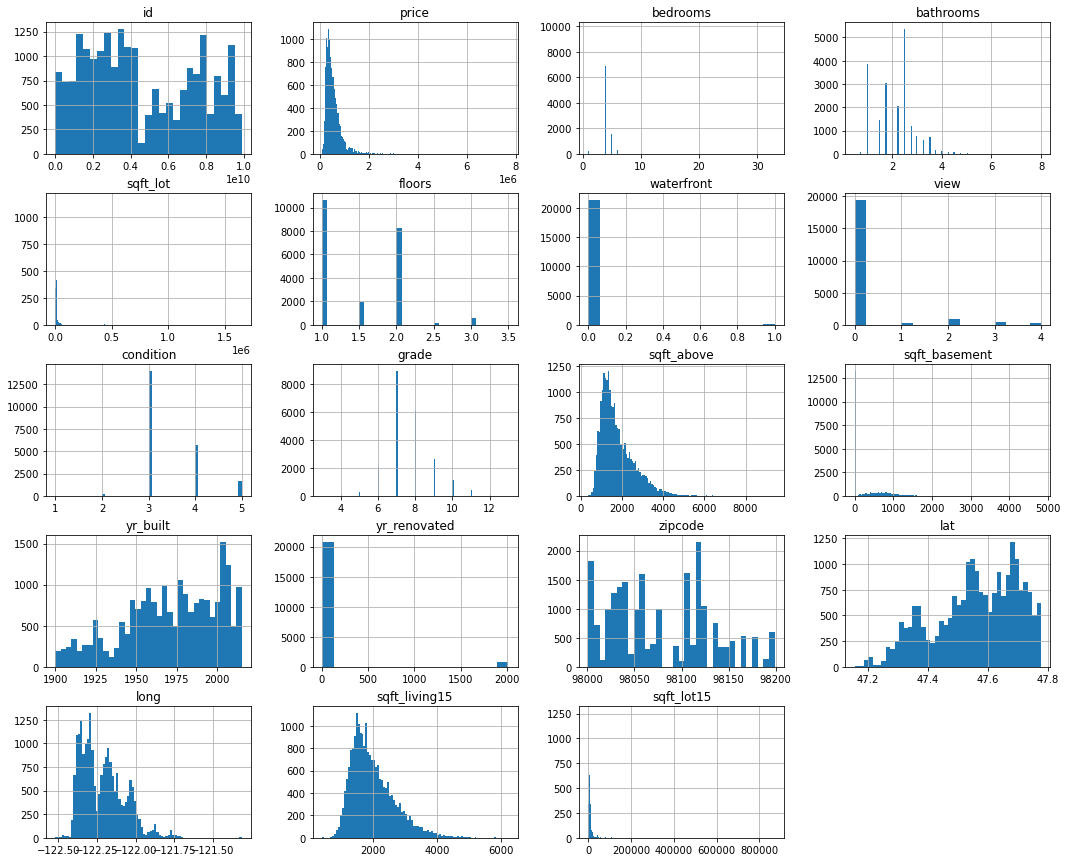

In [14]:
data.hist(figsize=(18,15), bins = 'auto');

Based on these histograms, the following columns appear to be categorical:
* bedrooms
* bathrooms
* floors
* waterfront
* view
* condition
* grade

This is because these columns have distinct, discrete values for each home. Some of these variables need to be further investigated, but let's address these clearly categorical columns for now.

Let's now separate these columns into continuous and categorical variables to be handled separately.

In [15]:
conts = []
cats = []
for col in data.columns:
    if data[col].nunique()<30:
        cats.append(col)
    else:
        conts.append(col)

In [16]:
conts

['id',
 'date',
 'price',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [17]:
cats

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

Using a cutoff of unique values less than 30, we get the same resulting categorical columns as when we viewed the histograms for each column.

However, we noticed earlier that zipcodes were included in our dataset. These shouldn't really be considered continuous, as zipcode is a discrete value. Since there are 70 zipcodes in the dataset, let's include our zipcodes as categorical and bin into groups based on number.

In [18]:
conts.remove('zipcode')
cats.append('zipcode')

In [19]:
cats

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'zipcode']

Longitude and latitude are also included in the dataset. It could be a good idea to separate these into quadrants--longitude and latitude may be a better indicator of price than zipcode, but we will leave both in our model for now.

In [20]:
# explore lat and long to decide cutoff points for the quandrants

data.lat.describe()

count    21597.000000
mean        47.560093
std          0.138552
min         47.155900
25%         47.471100
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

In [21]:
data.long.describe()

count    21597.000000
mean      -122.213982
std          0.140724
min       -122.519000
25%       -122.328000
50%       -122.231000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

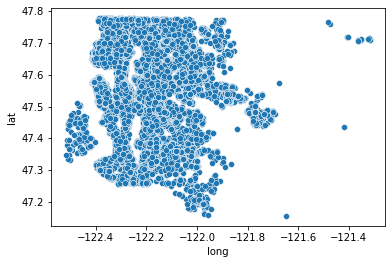

In [22]:
sns.scatterplot(data=data, x="long", y="lat", palette = "rocket_r");

Let's use 47.5 as our cutoff for latitude and -122.2 for longitude.

In [23]:
# create a formula for determining which quadrant the data falls in.

def quadrant(lat, long):
    if (lat >= 47.5) & (long <=-122.2):
        return 1
    elif (lat >= 47.5) & (long >-122.2):
        return 2
    elif (lat < 47.5) & (long <=-122.2):
        return 3
    else:
        return 4

In [24]:
data['coordinates'] = data.apply(lambda x: list([x['lat'], x['long']]), axis=1)

In [25]:
# create a new column called quadrant that categorizes the location

data['quadrant']= data['coordinates'].apply(lambda x: quadrant(x[0],x[1]))

In [26]:
data.quadrant.value_counts()

1    9221
2    5775
4    3503
3    3098
Name: quadrant, dtype: int64

In [27]:
# add quadrant to our categorical variable list

cats.append('quadrant')


In [28]:
data.drop('coordinates', inplace=True, axis=1)

### One Hot Encoding Categorical Variables

In [29]:
df_cat = data.loc[:,cats]

In [30]:
df_cat

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,quadrant
0,3,1.00,1.0,0.0,0.0,3,7,98178,1
1,3,2.25,2.0,0.0,0.0,3,7,98125,1
2,2,1.00,1.0,0.0,0.0,3,6,98028,1
3,4,3.00,1.0,0.0,0.0,5,7,98136,1
4,3,2.00,1.0,0.0,0.0,3,8,98074,2
...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0.0,0.0,3,8,98103,1
21593,4,2.50,2.0,0.0,0.0,3,8,98146,1
21594,2,0.75,2.0,0.0,0.0,3,7,98144,1
21595,3,2.50,2.0,0.0,0.0,3,8,98027,2


In [31]:
df_cat.nunique()

bedrooms      12
bathrooms     29
floors         6
waterfront     2
view           5
condition      5
grade         11
zipcode       70
quadrant       4
dtype: int64

In [32]:
# Check the range of values for bathrooms to see if binning is appropriate.
df_cat.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

Since bathrooms has a large number of categories (20+) let's categorize this bathroom data into bins.

In [33]:
# use cut function to put bathroom data into bins

df_cat['bathrooms'] = pd.cut(df_cat.bathrooms, [0, 1, 2, 3, 4, 5, 6, 8], 
                             labels = ['0_to_1', '1_to_2', '2_to_3', '3_to_4', '4_to_5', '5_to_6', '6_plus'])

Bedrooms may also be helpful to bin, since there are 12 categories.

In [34]:
df_cat['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [35]:
df_cat['bedrooms'] = pd.cut(df_cat.bedrooms, [0,1,2,3,4,5,33],
                           labels = ['1','2','3','4','5','6_plus'])

Let's also categorize the zipcode data as we mentioned earlier.


In [36]:
# check the range of values for zipcodes to see the best way to properly bin.
df_cat.groupby(by='zipcode').count()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,quadrant
zipcode,,,,,,,,
98001,361,361,361,361,361,361,361,361
98002,199,199,199,199,199,199,199,199
98003,280,280,280,280,280,280,280,280
98004,317,317,317,317,317,317,317,317
98005,168,168,168,168,168,168,168,168
...,...,...,...,...,...,...,...,...
98177,255,255,255,255,255,255,255,255
98178,262,262,262,262,262,262,262,262
98188,136,136,136,136,136,136,136,136


There are about 200 zipcodes between the first and last zipcodes, so let's separate into 4 groups.

In [37]:
df_cat['zipcode'] = pd.cut(df_cat.zipcode, [98000, 98050, 98100, 98150, 98200],
                                labels = ['98001_to_98050','98051_to_98100', '98101_to_98150', '98150_to_98200'])

In [38]:
# Use a for loop to create a new dataframe of dummy variables
dataset = pd.DataFrame()
for col in df_cat.columns:
    col_dummies = pd.get_dummies(df_cat[col], prefix = str(col)[:5], drop_first=True)
    dataset = pd.concat([dataset, col_dummies], axis=1)

dataset

,bedro_2,bedro_3,bedro_4,bedro_5,bedro_6_plus,bathr_1_to_2,bathr_2_to_3,bathr_3_to_4,bathr_4_to_5,bathr_5_to_6,...,grade_10,grade_11,grade_12,grade_13,zipco_98051_to_98100,zipco_98101_to_98150,zipco_98150_to_98200,quadr_2,quadr_3,quadr_4
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
21593,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
21594,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
21595,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
data_model_2 = pd.concat([data, dataset], axis=1)

data_model_2.drop(columns=cats, inplace=True)

In [40]:
data_model_2.columns

Index(['id', 'date', 'price', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'bedro_2', 'bedro_3', 'bedro_4', 'bedro_5',
       'bedro_6_plus', 'bathr_1_to_2', 'bathr_2_to_3', 'bathr_3_to_4',
       'bathr_4_to_5', 'bathr_5_to_6', 'bathr_6_plus', 'floor_1.5',
       'floor_2.0', 'floor_2.5', 'floor_3.0', 'floor_3.5', 'water_1.0',
       'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0', 'condi_2', 'condi_3',
       'condi_4', 'condi_5', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13',
       'zipco_98051_to_98100', 'zipco_98101_to_98150', 'zipco_98150_to_98200',
       'quadr_2', 'quadr_3', 'quadr_4'],
      dtype='object')

In [41]:
data_model_2.drop(columns=['lat', 'long'], inplace=True)

### Run New Model

In [42]:
y = data_model_2['price']
X = data_model_2.drop(['price', 'id', 'date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


In [43]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
y_hat_train = model_2.predict(X_train)
y_hat_test = model_2.predict(X_test)

In [44]:
metrics.r2_score(y_train, y_hat_train)

0.751766252959812

Our R-squared score has improved from .7 to .75. Let's also look at the model summary and see if any insights can be gained to further improve the model and check the RMSE.

In [45]:
X_int = sm.add_constant(X_train)
model_2 = sm.OLS(y_train, X_int).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     1087.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:45:59   Log-Likelihood:            -2.3398e+05
No. Observations:               17277   AIC:                         4.681e+05
Df Residuals:                   17228   BIC:                         4.684e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.237e+06    2.5e+05     12.930      0.000    2.75e+06    3.73e+06
sqft_lot                 0.1157      0.050      2.292      0.022       0.017       0.215
sqft_above             144.8937      4.023     36.016      0.000     137.008     152.779
sqft_basement          119.4943      4.522     26.426      0.000     110.631     128.357
yr_built             -1544.2010     85.151    -18.135      0.000   -1711.105   -1377.297
yr_renovated            39.4186      4.119      9.569      0.000      31.344      47.493
sqft_living15           42.3973      3.692     11.484      0.000      35.161      49.634
sqft_lot15              -0.3657      0.078     -4.682      0.000      -0.519      -0.213
bedro_2               2.641e+04   1.56e+04      1.693      0.090   -4165.561     5.7e+04
bedro_3               1.667e+04   1.57e+04      1.065      0.287    -1.4e+04    4.73e+04
bedro_4              -8292.3671    1.6e+04     -0.518      0.604   -3.96e+04    2.31e+04
bedro_5              -1.025e+04   1.68e+04     -0.608      0.543   -4.33e+04    2.28e+04
bedro_6_plus         -4.844e+04   1.98e+04     -2.441      0.015   -8.73e+04   -9550.704
bathr_1_to_2          8522.1910   4986.566      1.709      0.087   -1251.986    1.83e+04
bathr_2_to_3          1.988e+04   6376.568      3.117      0.002    7379.602    3.24e+04
bathr_3_to_4          7.815e+04   9361.461      8.348      0.000    5.98e+04    9.65e+04
bathr_4_to_5          2.356e+05    1.7e+04     13.893      0.000    2.02e+05    2.69e+05
bathr_5_to_6          5.661e+05   3.97e+04     14.271      0.000    4.88e+05    6.44e+05
bathr_6_plus          3.901e+05   6.66e+04      5.859      0.000     2.6e+05    5.21e+05
floor_1.5            -1285.5365   5643.883     -0.228      0.820   -1.23e+04    9777.048
floor_2.0            -7381.5756   4777.735     -1.545      0.122   -1.67e+04    1983.270
floor_2.5             1.133e+05   1.72e+04      6.596      0.000    7.96e+04    1.47e+05
floor_3.0             2.286e+04   1.03e+04      2.219      0.027    2664.797    4.31e+04
floor_3.5             1.492e+05   7.57e+04      1.971      0.049     810.322    2.98e+05
water_1.0             5.895e+05   2.06e+04     28.554      0.000    5.49e+05     6.3e+05
view_1.0              9.374e+04   1.18e+04      7.947      0.000    7.06e+04    1.17e+05
view_2.0              5.424e+04   7050.377      7.694      0.000    4.04e+04    6.81e+04
view_3.0              1.078e+05   9705.214     11.110      0.000    8.88e+04    1.27e+05
view_4.0               2.11e+05   1.46e+04     14.446      0.000    1.82e+05     2.4e+05
condi_2               3.205e+04   4.43e+04      0.723      0.470   -5.48e+04    1.19e+05
condi_3               3.329e+04   4.17e+04      0.798      0.425   -4.85e+04    1.15e+05
condi_4               7.284e+04   4.17e+04      1.745    

In [46]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 184224.76689817134
RMSE Test: 179236.18978231683


Our RMSE has also slightly improved.

Looking at p-values in the table, it looks like not all of our features are statistically significant using a p-value cut off of 0.05. It's interesting to note number of bedrooms does not seem to have a significant relationship with price, while bathrooms do seem to have a significant relationship. The location of the home also seems to be important.

Let's remove some of these features with p-values above 0.05 to simplify our model.

## Model 3: Remove Statistically Insignificant Features

### Drop Columns with p-values > 0.05

To improve our model, let's remove all features with p-values greater than 0.05.

In [47]:
summary = model_2.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)

In [48]:
p_table.columns = p_table.iloc[0]

In [49]:
p_table.drop(0, inplace=True)

In [50]:
p_table.set_index(p_table.columns[0], inplace=True)

In [51]:
p_table

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
const,3.237e+06,2.5e+05,12.930,0.000,2.75e+06,3.73e+06
sqft_lot,0.1157,0.050,2.292,0.022,0.017,0.215
sqft_above,144.8937,4.023,36.016,0.000,137.008,152.779
sqft_basement,119.4943,4.522,26.426,0.000,110.631,128.357
yr_built,-1544.2010,85.151,-18.135,0.000,-1711.105,-1377.297
yr_renovated,39.4186,4.119,9.569,0.000,31.344,47.493
sqft_living15,42.3973,3.692,11.484,0.000,35.161,49.634
sqft_lot15,-0.3657,0.078,-4.682,0.000,-0.519,-0.213
bedro_2,2.641e+04,1.56e+04,1.693,0.090,-4165.561,5.7e+04


In [52]:
p_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, const to quadr_4
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   coef     49 non-null     object
 1   std err  49 non-null     object
 2   t        49 non-null     object
 3   P>|t|    49 non-null     object
 4   [0.025   49 non-null     object
 5   0.975]   49 non-null     object
dtypes: object(6)
memory usage: 2.7+ KB


In [53]:
p_table['P>|t|'] = p_table['P>|t|'].astype(float)

In [54]:
new_x_cols = list(p_table[p_table['P>|t|']<0.05].index)
new_x_cols

['const',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'sqft_living15',
 'sqft_lot15',
 'bedro_6_plus',
 'bathr_2_to_3',
 'bathr_3_to_4',
 'bathr_4_to_5',
 'bathr_5_to_6',
 'bathr_6_plus',
 'floor_2.5',
 'floor_3.0',
 'floor_3.5',
 'water_1.0',
 'view_1.0',
 'view_2.0',
 'view_3.0',
 'view_4.0',
 'condi_5',
 'grade_11',
 'grade_12',
 'grade_13',
 'zipco_98051_to_98100',
 'zipco_98101_to_98150',
 'zipco_98150_to_98200',
 'quadr_2',
 'quadr_3',
 'quadr_4']

In [55]:
# drop x cols above 0.05
del_x_cols = list(p_table[p_table['P>|t|']>0.05].index)
del_x_cols

['bedro_2',
 'bedro_3',
 'bedro_4',
 'bedro_5',
 'bathr_1_to_2',
 'floor_1.5',
 'floor_2.0',
 'condi_2',
 'condi_3',
 'condi_4',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10']

In [56]:
new_x_cols.remove('const')

In [57]:
print(len(X.columns), len(new_x_cols))

48 31


In [58]:
data_model_3 = data_model_2.drop(del_x_cols, axis=1)
data_model_3.head()

,id,date,price,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,...,condi_5,grade_11,grade_12,grade_13,zipco_98051_to_98100,zipco_98101_to_98150,zipco_98150_to_98200,quadr_2,quadr_3,quadr_4
0,7129300520,2014-10-13,221900.0,5650,1180,0.0,1955,0.0,1340,5650,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,538000.0,7242,2170,400.0,1951,1991.0,1690,7639,...,0,0,0,0,0,1,0,0,0,0
2,5631500400,2015-02-25,180000.0,10000,770,0.0,1933,0.0,2720,8062,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,5000,1050,910.0,1965,0.0,1360,5000,...,1,0,0,0,0,1,0,0,0,0
4,1954400510,2015-02-18,510000.0,8080,1680,0.0,1987,0.0,1800,7503,...,0,0,0,0,1,0,0,1,0,0


### Run New Model

In [59]:
y = data_model_3['price']
X = data_model_3.drop(['price', 'id', 'date'], axis=1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
model_3 = LinearRegression()
model_3.fit(X_train, y_train)
y_hat_train = model_3.predict(X_train)
y_hat_test = model_3.predict(X_test)
metrics.r2_score(y_train, y_hat_train)

0.7273119333204522

Our R-squared value dropped slightly to .73 after removing 17 features. Let's also check how our RMSE values have changed.

In [61]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 193085.9488339999
RMSE Test: 188114.07830792482


Our RMSE remained relatively close to the RMSE in our earlier model, leading us to conclude this is a better model (same result without uninfluential features). Next, let's check if our assumptions for linear regression are in place.

### Check Normality Assumption

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
X_int = sm.add_constant(X_train)
model_3 = sm.OLS(y_train, X_int).fit()

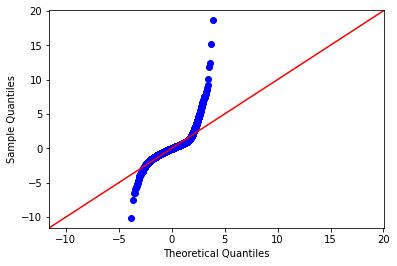

In [63]:
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

### Check Homoscedasticity Assumption

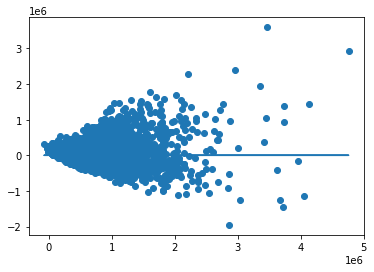

In [64]:
plt.scatter(model_3.predict(X_int), model_3.resid)
plt.plot(model_3.predict(X_int), [0 for i in range(len(X_int))])

It looks like the normality assumption is definitely violated at the outliers of the data. It also looks like homoscedasticity is also being violated in the scatter of the residuals. Let's remove outliers and see if it helps our data at all.

## Model 4: Remove Outliers

### Explore Distribution of Data

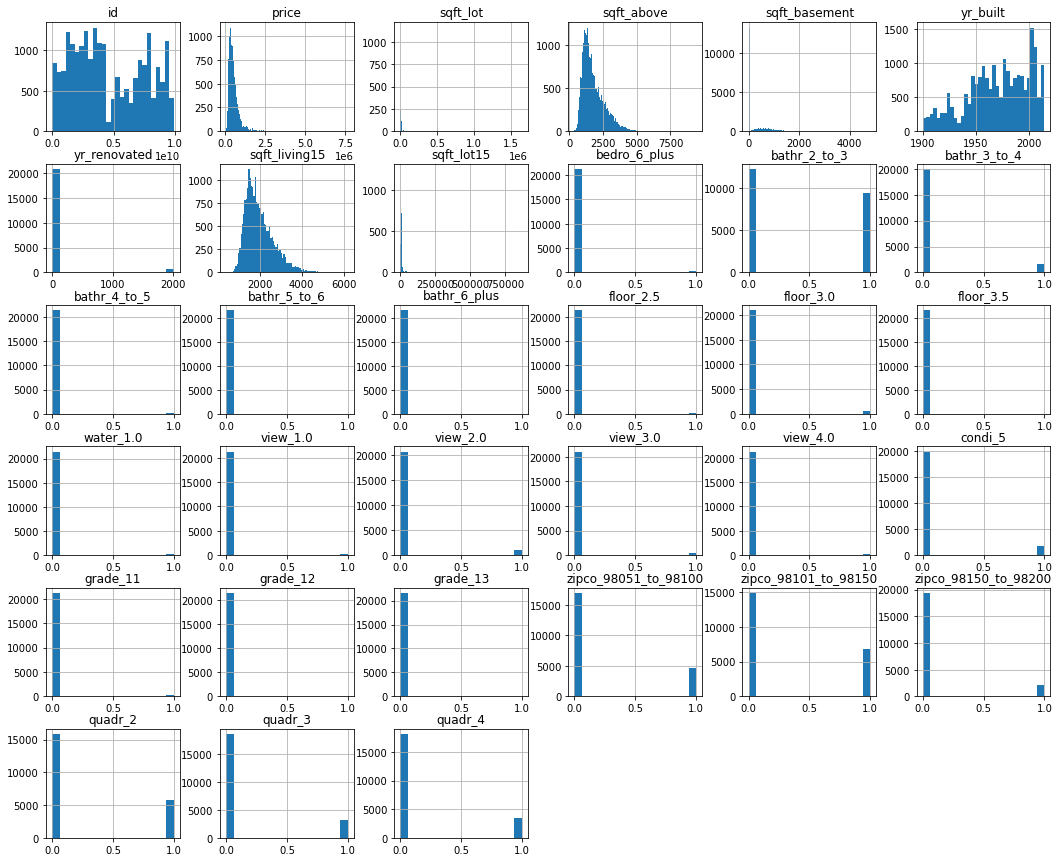

In [65]:
data_model_3.hist(figsize=(18,15), bins = 'auto');

It looks like there are a number of outliers in some of our independent variables and our dependent variable, price. Let's take a closer look at price, since sometimes fixing outliers in the dependent variable can fix outliers in other variables.

<AxesSubplot:>

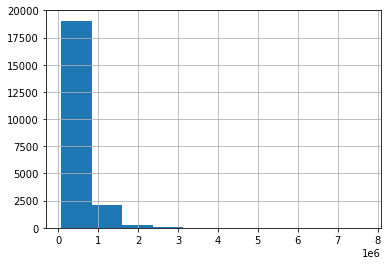

In [66]:
data_model_3.price.hist()

<AxesSubplot:xlabel='price'>

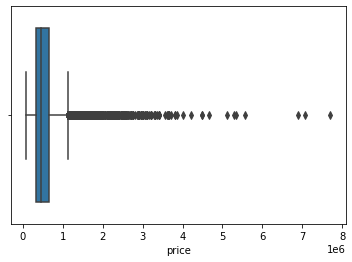

In [67]:
sns.boxplot(x=data_model_3['price'])

It looks like it might be a good idea to remove any homes above 2 million dollars in price. Since ABC agency's clients are younger with less money to invest in homes above $2 million, it seems reasonable to eliminate these outliers. Before removing these outliers, let's check if using Z-score to eliminate outliers is a good strategy.

### Remove Price Outliers based on Z-Score

In [68]:
z = np.abs(stats.zscore(data_model_3.price))
z

array([0.86671627, 0.00625157, 0.98077344, ..., 0.37618606, 0.38190525,
       0.58606486])

In [69]:
data_model_4a = data_model_3[(z<3)]

In [70]:
data_model_4a.shape

(21191, 34)

<AxesSubplot:>

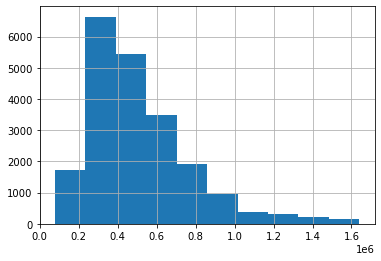

In [71]:
data_model_4a.price.hist()

It looks like removing outliers using z-score achieved our goal of eliminating price under 2 million. Let's run a new model and check if losing this data affected the model's accuracy.

In [72]:
y = data_model_4a['price']
X = data_model_4a.drop(['price', 'id', 'date'], axis=1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
model_4a = LinearRegression()
model_4a.fit(X_train, y_train)
y_hat_train = model_4a.predict(X_train)
y_hat_test = model_4a.predict(X_test)
metrics.r2_score(y_train, y_hat_train)

0.6964827995878333

In [74]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 143484.9419359686
RMSE Test: 141204.153961676


In [75]:
data_model_4a.shape[0]-data_model_3.shape[0]

-406

It looks like we lost about 400 values by eliminating outliers using z-score. Our model also lost some accuracy, dropping to an Rsquared value of .70. Our RMSE, however, decreased significantly. Let's check if removing outliers a different way works better.

### Aternate Aproach: Remove Outliers Based on Price Cutoff

In [76]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, data_model_3.price.quantile(q=q)))

0.8 percentile: 700435.9999999998
0.81 percentile: 718000.0
0.82 percentile: 730000.72
0.83 percentile: 749950.0
0.84 percentile: 760003.2
0.85 percentile: 779721.9999999991
0.86 percentile: 799000.0
0.87 percentile: 815000.0
0.88 percentile: 836739.9999999998
0.89 percentile: 859967.6
0.9 percentile: 887000.0
0.91 percentile: 919993.6
0.92 percentile: 950000.0
0.93 percentile: 997964.0000000002
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


In [77]:
orig_tot = len(data_model_3)
data_model_4b = data_model_3[data_model_3.price < 2000000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(data_model_4b))/orig_tot)
# data_new.price = data_new.price.map(np.log) # Applying a log transformation

Percent removed: 0.009630967263971849


<AxesSubplot:>

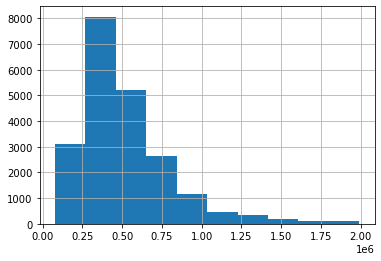

In [78]:
data_model_4b.price.hist()

In [79]:
# Refit model with subset features
y = data_model_4b['price']
X = data_model_4b.drop(['price', 'id', 'date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

model_4b = LinearRegression()
model_4b.fit(X_train, y_train)
y_hat_train = model_4b.predict(X_train)
y_hat_test = model_4b.predict(X_test)
metrics.r2_score(y_train, y_hat_train)

0.7056673212919178

In [80]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 155844.5849414766
RMSE Test: 155029.11719674882


In [81]:
data_model_4b.shape[0]-data_model_3.shape[0]

-208

Removing outliers in this way gave us a slightly better R squared score than by using z-score. Our RMSE also improved over model 3. We were able to preserve about 200 more values in this method, so let's use this model going forward.

### Recheck Normality and Homoscedasticity Assumptions

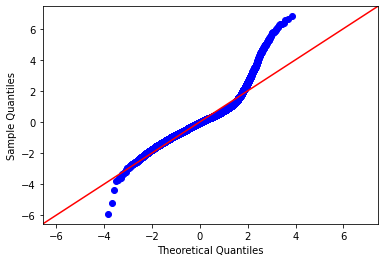

In [82]:
X_int = sm.add_constant(X_train)
model_4b = sm.OLS(y_train, X_int).fit()
fig = sm.graphics.qqplot(model_4b.resid, dist=stats.norm, line='45', fit=True)

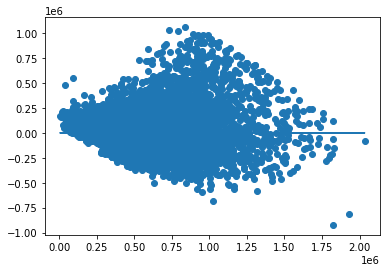

In [83]:
plt.scatter(model_4b.predict(X_int), model_4b.resid)
plt.plot(model_4b.predict(X_int), [0 for i in range(len(X_int))])

The normality of the residuals have improved, but it looks like it's still being violated. Homoscedasticity has also improved, but we still have a slight cone shape. We may need to try transforming our data in order to improve our model further. Before doing that, though, let's check our variables for multicollinearity.

## Model 5: Adjust for Multicollinearity

### Investigate Pairwise Correlation

In [84]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_pairs=data_model_4b.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_pairs['pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))

# set index to pairs
df_pairs.set_index(['pairs'], inplace = True)

#d rop level columns
df_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_pairs.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_pairs.drop_duplicates(inplace=True)

In [85]:
df_pairs[(df_pairs.cc>.7) & (df_pairs.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living15)",0.727492
"(sqft_lot15, sqft_lot)",0.713364


We can confirm there is no pairwise correlation present.

### Investigate multicollinearity

In [86]:
X = data_model_4b.drop(['price', 'id', 'date'], axis=1)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(new_x_cols, vif))

[('sqft_lot', 2.3447767733444262),
 ('sqft_above', 21.29457486810911),
 ('sqft_basement', 2.076410433156791),
 ('yr_built', 29.564235362791113),
 ('yr_renovated', 1.0626649793220524),
 ('sqft_living15', 28.14228874088857),
 ('sqft_lot15', 2.5467596404490807),
 ('bedro_6_plus', 1.0975052449434137),
 ('bathr_2_to_3', 3.0045889037600184),
 ('bathr_3_to_4', 1.8380556645221025),
 ('bathr_4_to_5', 1.2449419803833142),
 ('bathr_5_to_6', 1.0763708932172662),
 ('bathr_6_plus', 1.022567294824475),
 ('floor_2.5', 1.0237215090919451),
 ('floor_3.0', 1.1498603634080846),
 ('floor_3.5', 1.0024905404300029),
 ('water_1.0', 1.3973347043510105),
 ('view_1.0', 1.046717054090999),
 ('view_2.0', 1.1109992386220107),
 ('view_3.0', 1.1056588250090413),
 ('view_4.0', 1.4474853953892843),
 ('condi_5', 1.1225961069635082),
 ('grade_11', 1.2240991474440654),
 ('grade_12', 1.0946142620421884),
 ('grade_13', 1.002951353979553),
 ('zipco_98051_to_98100', 1.830566741476571),
 ('zipco_98101_to_98150', 4.847585930114

In [87]:
vif_scores = list(zip(new_x_cols, vif))
multi_co_cols = [x for x,vif in vif_scores if vif > 5]
multi_co_cols

['sqft_above', 'yr_built', 'sqft_living15']

In [88]:
data_model_5a = data_model_4b.drop('sqft_living15', axis=1)

In [89]:
data_model_5b = data_model_4b.drop('yr_built', axis=1)

In [90]:
data_model_5c = data_model_4b.drop('sqft_above', axis=1)

In [91]:
data_model_5d = data_model_4b.drop(multi_co_cols, axis=1)

In [92]:
y = data_model_5d['price']
X = data_model_5d.drop(['price', 'id', 'date'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
model_5 = LinearRegression()
model_5.fit(X_train, y_train)
y_hat_train = model_5.predict(X_train)
y_hat_test = model_5.predict(X_test)
metrics.r2_score(y_train, y_hat_train)

0.5555721819083574

In [93]:
y = data_model_5b['price']
X = data_model_5b.drop(['price', 'id', 'date'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
model_5 = LinearRegression()
model_5.fit(X_train, y_train)
y_hat_train = model_5.predict(X_train)
y_hat_test = model_5.predict(X_test)
metrics.r2_score(y_train, y_hat_train)

0.6989264206446139

In [94]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

RMSE Train: 156249.46890794893
RMSE Test: 161256.16494939025


In [95]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(new_x_cols, vif))

[('sqft_lot', 2.344762701972133),
 ('sqft_above', 20.704135597441017),
 ('sqft_basement', 2.0521178172709162),
 ('yr_built', 1.062156993620382),
 ('yr_renovated', 21.537986287029366),
 ('sqft_living15', 2.5465271727284846),
 ('sqft_lot15', 1.0971473739613387),
 ('bedro_6_plus', 2.971047631997703),
 ('bathr_2_to_3', 1.781261899884595),
 ('bathr_3_to_4', 1.233662577159461),
 ('bathr_4_to_5', 1.0754098049103593),
 ('bathr_5_to_6', 1.022357257220077),
 ('bathr_6_plus', 1.0232996481613426),
 ('floor_2.5', 1.138667885837819),
 ('floor_3.0', 1.0023489770356675),
 ('floor_3.5', 1.396527754292314),
 ('water_1.0', 1.0457539205491262),
 ('view_1.0', 1.1046174120351857),
 ('view_2.0', 1.095440800431151),
 ('view_3.0', 1.433852293994957),
 ('view_4.0', 1.117598451775245),
 ('condi_5', 1.1938588426515273),
 ('grade_11', 1.0819079713859818),
 ('grade_12', 1.0019746931780713),
 ('grade_13', 1.8281790161437959),
 ('zipco_98051_to_98100', 2.400771672262677),
 ('zipco_98101_to_98150', 1.4262390283730788)

In [96]:
X_int = sm.add_constant(X_train)
model_5 = sm.OLS(y_train, X_int).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     1322.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:46:37   Log-Likelihood:            -2.2891e+05
No. Observations:               17111   AIC:                         4.579e+05
Df Residuals:                   17080   BIC:                         4.581e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.211e+05   6504.172     18.617      0.000    1.08e+05    1.34e+05
sqft_lot                 0.2211      0.041      5.333      0.000       0.140       0.302
sqft_above             159.1455      2.858     55.677      0.000     153.543     164.748
sqft_basement          115.6271      3.367     34.338      0.000     109.027     122.227
yr_renovated            43.7954      3.391     12.913      0.000      37.148      50.443
sqft_living15           83.7518      3.073     27.251      0.000      77.728      89.776
sqft_lot15              -0.2009      0.065     -3.087      0.002      -0.328      -0.073
bedro_6_plus         -6.705e+04   1.03e+04     -6.512      0.000   -8.72e+04   -4.69e+04
bathr_2_to_3         -4068.6710   3156.286     -1.289      0.197   -1.03e+04    2117.974
bathr_3_to_4          6.443e+04   6089.520     10.580      0.000    5.25e+04    7.64e+04
bathr_4_to_5          8.594e+04   1.47e+04      5.866      0.000    5.72e+04    1.15e+05
bathr_5_to_6         -8.567e+04   4.29e+04     -1.995      0.046    -1.7e+05   -1505.571
bathr_6_plus         -3.011e+05   9.16e+04     -3.288      0.001   -4.81e+05   -1.22e+05
floor_2.5             9.026e+04   1.48e+04      6.094      0.000    6.12e+04    1.19e+05
floor_3.0             2.131e+04   7713.782      2.763      0.006    6190.486    3.64e+04
floor_3.5              2.33e+04   7.83e+04      0.298      0.766    -1.3e+05    1.77e+05
water_1.0             2.955e+05   2.09e+04     14.129      0.000    2.54e+05    3.36e+05
view_1.0              9.395e+04   1.02e+04      9.202      0.000    7.39e+04    1.14e+05
view_2.0              6.708e+04   6065.479     11.059      0.000    5.52e+04     7.9e+04
view_3.0                1.4e+05   8376.277     16.719      0.000    1.24e+05    1.56e+05
view_4.0              2.513e+05   1.33e+04     18.907      0.000    2.25e+05    2.77e+05
condi_5               8.091e+04   4515.154     17.919      0.000    7.21e+04    8.98e+04
grade_11              1.277e+05   1.08e+04     11.854      0.000    1.07e+05    1.49e+05
grade_12              2.692e+05   2.43e+04     11.068      0.000    2.22e+05    3.17e+05
grade_13                4.4e+05   1.57e+05      2.808      0.005    1.33e+05    7.47e+05
zipco_98051_to_98100  -3.92e+04   3487.311    -11.241      0.000    -4.6e+04   -3.24e+04
zipco_98101_to_98150 -1244.1405   4765.906     -0.261      0.794   -1.06e+04    8097.526
zipco_98150_to_98200 -3.802e+04   4960.299     -7.664      0.000   -4.77e+04   -2.83e+04
quadr_2              -6.973e+04   4989.352    -13.976      0.000   -7.95e+04      -6e+04
quadr_3              -2.549e+05   4627.382    -55.079      0.000   -2.64e+05   -2.46e+05
quadr_4              -2.533e+05   5269.826    -48.061      0.000   -2.64e+05   -2.43e+05
=========================================================

It looks like our model lost some accuracy by removing the multicollinear features, with an R-squared value of .69. FOr the sake of having a more accurate model, we are going to stick with the model that contains these colinear features.

## Model 6: Log Transform the dependent variable (or some independent variables)

Let's go back and check our assumptions of linear regression again.

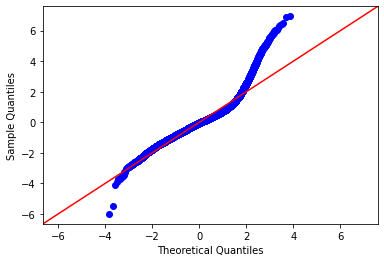

In [97]:
X_int = sm.add_constant(X_train)
model_5 = sm.OLS(y_train, X_int).fit()
fig = sm.graphics.qqplot(model_5.resid, dist=stats.norm, line='45', fit=True)

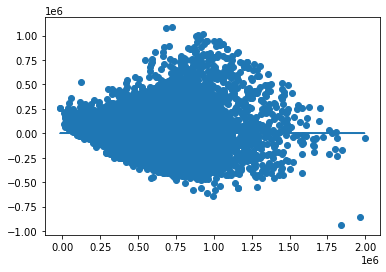

In [98]:
plt.scatter(model_5.predict(X_int), model_5.resid)
plt.plot(model_5.predict(X_int), [0 for i in range(len(X_int))])

We clearly still have some violations of our residual normality and homoscedasticity assumptions. A log transformation may be necessary in this case. Let's look at the distribution of our variables and see if there is a particular variable we should consider log transforming.

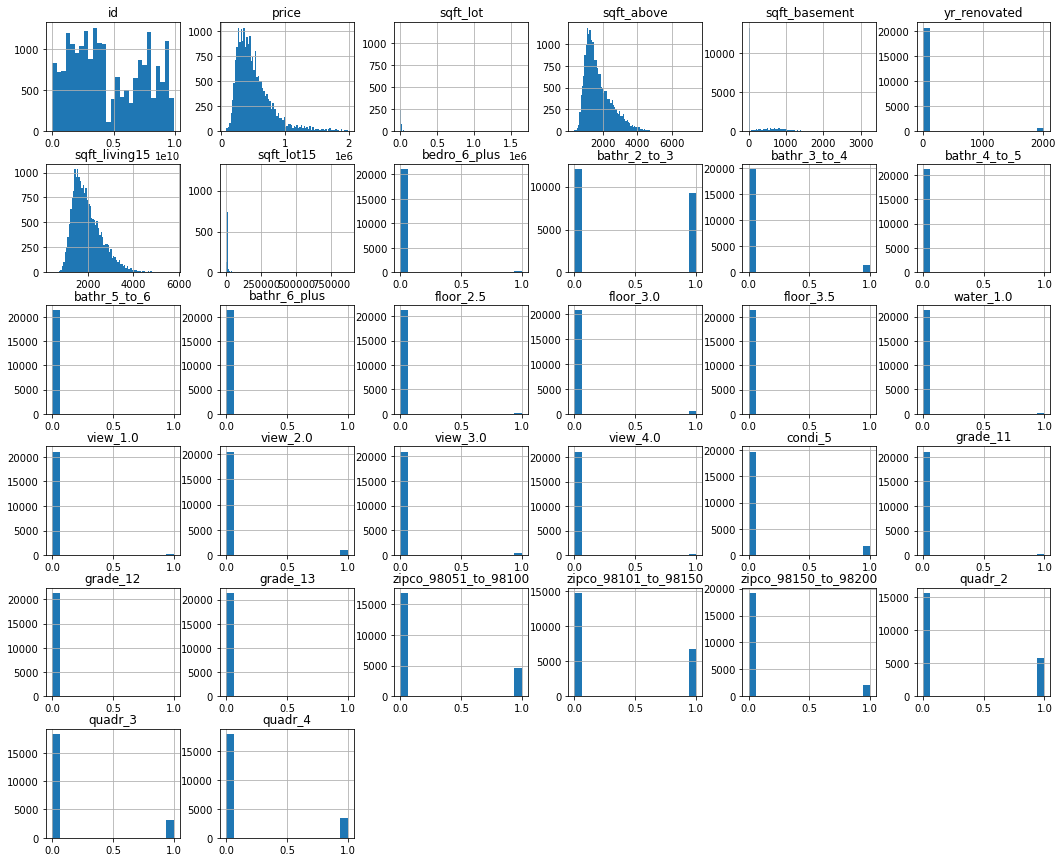

In [99]:
data_model_5b.hist(figsize=(18,15), bins = 'auto');

We only have a handful of continuous variables left in our model. Let's run models for 2 different scenarios-- 1) log transforming all of our square footage independent variables, and 2) log transforming our dependent variable, price.

### Log transforming independent variables

In [100]:
data_model_5b.describe()

,id,price,sqft_lot,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,bedro_6_plus,bathr_2_to_3,...,condi_5,grade_11,grade_12,grade_13,zipco_98051_to_98100,zipco_98101_to_98150,zipco_98150_to_98200,quadr_2,quadr_3,quadr_4
count,2.138900e+04,2.138900e+04,2.138900e+04,21389.000000,21389.000000,21389.000000,21389.000000,21389.000000,21389.000000,21389.000000,...,21389.000000,21389.000000,21389.000000,21389.000000,21389.000000,21389.000000,21389.000000,21389.000000,21389.000000,21389.000000
mean,4.586072e+09,5.189146e+05,1.498491e+04,1767.124831,278.844967,66.906213,1972.047127,12686.237692,0.014727,0.435551,...,0.078124,0.015195,0.002571,0.000047,0.215438,0.312824,0.103044,0.268362,0.144747,0.163776
std,2.877593e+09,2.862905e+05,4.096313e+04,792.013335,427.920329,359.271048,668.208775,27168.116149,0.120462,0.495841,...,0.268373,0.122330,0.050645,0.006838,0.411135,0.463654,0.304023,0.443118,0.351854,0.370081
min,1.000102e+06,7.800000e+04,5.200000e+02,370.000000,0.000000,0.000000,399.000000,651.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.124069e+09,3.200000e+05,5.027000e+03,1190.000000,0.000000,0.000000,1480.000000,5100.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.904990e+09,4.500000e+05,7.577000e+03,1550.000000,0.000000,0.000000,1830.000000,7600.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.319900e+09,6.350000e+05,1.054800e+04,2190.000000,530.000000,0.000000,2340.000000,10022.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,9.900000e+09,1.990000e+06,1.651359e+06,7420.000000,3260.000000,2015.000000,5790.000000,871200.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

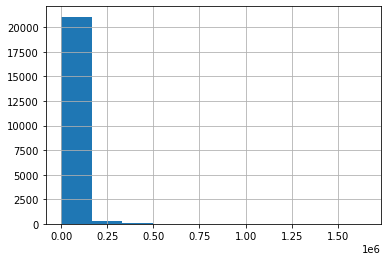

In [101]:
data_model_5b.sqft_lot.hist()

In [102]:
sqft = ['sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']

col_names = [str(col+'_log') for col in sqft]

data_model_6a = data_model_5b.copy()
data_model_6a[col_names] = np.log(data_model_6a[sqft])

In [103]:
data_model_6a.head()

,id,date,price,sqft_lot,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,bedro_6_plus,...,zipco_98051_to_98100,zipco_98101_to_98150,zipco_98150_to_98200,quadr_2,quadr_3,quadr_4,sqft_lot_log,sqft_above_log,sqft_living15_log,sqft_lot15_log
0,7129300520,2014-10-13,221900.0,5650,1180,0.0,0.0,1340,5650,0,...,0,0,1,0,0,0,8.639411,7.073270,7.200425,8.639411
1,6414100192,2014-12-09,538000.0,7242,2170,400.0,1991.0,1690,7639,0,...,0,1,0,0,0,0,8.887653,7.682482,7.432484,8.941022
2,5631500400,2015-02-25,180000.0,10000,770,0.0,0.0,2720,8062,0,...,0,0,0,0,0,0,9.210340,6.646391,7.908387,8.994917
3,2487200875,2014-12-09,604000.0,5000,1050,910.0,0.0,1360,5000,0,...,0,1,0,0,0,0,8.517193,6.956545,7.215240,8.517193
4,1954400510,2015-02-18,510000.0,8080,1680,0.0,0.0,1800,7503,0,...,1,0,0,1,0,0,8.997147,7.426549,7.495542,8.923058


In [104]:
data_model_6a.drop(sqft, inplace=True, axis=1)

In [105]:
y = data_model_6a['price']
X = data_model_6a.drop(['price', 'id', 'date'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
model_6a = LinearRegression()
model_6a.fit(X_train, y_train)
y_hat_train = model_6a.predict(X_train)
y_hat_test = model_6a.predict(X_test)
metrics.r2_score(y_train, y_hat_train)

0.6883871351761046

### Log transforming dependent variable

In [106]:
data_model_6b = data_model_5b.copy()

In [107]:
data_model_6b['price_log'] = np.log(data_model_6b['price'])

<AxesSubplot:>

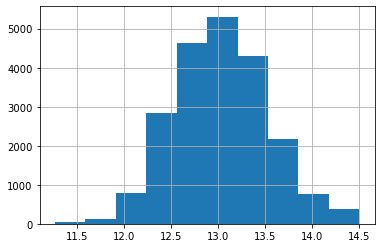

In [132]:
data_model_6b.price_log.hist()

In [109]:
y = data_model_6b['price_log']
X = data_model_6b.drop(['price', 'id', 'date', 'price_log'],axis=1)
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=22)
model_6b = LinearRegression()
model_6b.fit(X_train, y_train_log)
y_hat_train_log = model_6b.predict(X_train)
y_hat_test_log = model_6b.predict(X_test)
metrics.r2_score(y_train_log, y_hat_train_log)

0.7305963308433749

This looks much better! Let's check our RMSE values. We will need to inverse transform our residuals in order to interpret our error correctly.

In [110]:
print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train_log, y_hat_train_log)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test_log, y_hat_test_log)))

RMSE Train: 0.2594049866335426
RMSE Test: 0.2601134071240397


In [111]:
y_hat_train = np.exp(y_hat_train_log)
y_hat_test = np.exp(y_hat_test_log)
y_train = np.exp(y_train_log)
y_test = np.exp(y_test_log)

print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))


RMSE Train: 160744.40720687233
RMSE Test: 170214.84635896387


In [112]:
X_int = sm.add_constant(X_train)
model_6 = sm.OLS(y_train_log, X_int).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     1544.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:47:11   Log-Likelihood:                -1190.5
No. Observations:               17111   AIC:                             2443.
Df Residuals:                   17080   BIC:                             2683.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.2641      0.011   1135.755      0.000      12.243      12.285
sqft_lot              5.083e-07   6.88e-08      7.387      0.000    3.73e-07    6.43e-07
sqft_above               0.0003   4.75e-06     58.867      0.000       0.000       0.000
sqft_basement            0.0002   5.59e-06     38.569      0.000       0.000       0.000
yr_renovated          6.364e-05   5.63e-06     11.303      0.000    5.26e-05    7.47e-05
sqft_living15            0.0002    5.1e-06     30.967      0.000       0.000       0.000
sqft_lot15           -7.318e-08   1.08e-07     -0.677      0.498   -2.85e-07    1.39e-07
bedro_6_plus            -0.0941      0.017     -5.505      0.000      -0.128      -0.061
bathr_2_to_3             0.0392      0.005      7.482      0.000       0.029       0.049
bathr_3_to_4             0.0526      0.010      5.204      0.000       0.033       0.072
bathr_4_to_5            -0.0083      0.024     -0.340      0.733      -0.056       0.039
bathr_5_to_6            -0.2456      0.071     -3.445      0.001      -0.385      -0.106
bathr_6_plus            -0.4048      0.152     -2.663      0.008      -0.703      -0.107
floor_2.5                0.1014      0.025      4.123      0.000       0.053       0.150
floor_3.0                0.0502      0.013      3.919      0.000       0.025       0.075
floor_3.5                0.1000      0.130      0.770      0.442      -0.155       0.355
water_1.0                0.4625      0.035     13.322      0.000       0.394       0.531
view_1.0                 0.1589      0.017      9.371      0.000       0.126       0.192
view_2.0                 0.1193      0.010     11.849      0.000       0.100       0.139
view_3.0                 0.1763      0.014     12.675      0.000       0.149       0.204
view_4.0                 0.2675      0.022     12.121      0.000       0.224       0.311
condi_5                  0.1301      0.007     17.351      0.000       0.115       0.145
grade_11                -0.0449      0.018     -2.511      0.012      -0.080      -0.010
grade_12                -0.0843      0.040     -2.088      0.037      -0.163      -0.005
grade_13                -0.1190      0.260     -0.457      0.647      -0.629       0.391
zipco_98051_to_98100    -0.0374      0.006     -6.454      0.000      -0.049      -0.026
zipco_98101_to_98150     0.0720      0.008      9.103      0.000       0.057       0.088
zipco_98150_to_98200    -0.0266      0.008     -3.229      0.001      -0.043      -0.010
quadr_2                 -0.0550      0.008     -6.636      0.000      -0.071      -0.039
quadr_3                 -0.5416      0.008    -70.494      0.000      -0.557      -0.527
quadr_4                 -0.4676      0.009    -53.447      0.000      -0.485      -0.450
=========================================================

This model has both a high R2 and lower RMSE. Before finalizing our model, let's remove any variables with p-values below 0.05, and check our assumptions one last time.

In [113]:
cols_to_drop = ['sqft_lot15','bathr_4_to_5', 'floor_3.5', 'grade_13']

In [114]:
data_model_6c = data_model_6b.drop(cols_to_drop, axis=1)

In [115]:
y = data_model_6c['price_log']
X = data_model_6c.drop(['price', 'id', 'date', 'price_log'],axis=1)
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=22)
model_6b = LinearRegression()
model_6b.fit(X_train, y_train_log)
y_hat_train_log = model_6b.predict(X_train)
y_hat_test_log = model_6b.predict(X_test)
metrics.r2_score(y_train_log, y_hat_train_log)

0.7305747930373371

In [116]:
y_hat_train = np.exp(y_hat_train_log)
y_hat_test = np.exp(y_hat_test_log)
y_train = np.exp(y_train_log)
y_test = np.exp(y_test_log)

print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))


RMSE Train: 160822.3717940469
RMSE Test: 170258.5631720927


In [117]:
X_int = sm.add_constant(X_train)
model_6 = sm.OLS(y_train_log, X_int).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     1782.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:51:49   Log-Likelihood:                -1191.2
No. Observations:               17111   AIC:                             2436.
Df Residuals:                   17084   BIC:                             2646.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.2648      0.011   1142.719      0.000      12.244      12.286
sqft_lot               4.77e-07   5.05e-08      9.449      0.000    3.78e-07    5.76e-07
sqft_above               0.0003   4.55e-06     61.257      0.000       0.000       0.000
sqft_basement            0.0002    5.5e-06     39.157      0.000       0.000       0.000
yr_renovated          6.359e-05   5.63e-06     11.296      0.000    5.26e-05    7.46e-05
sqft_living15            0.0002   5.08e-06     31.027      0.000       0.000       0.000
bedro_6_plus            -0.0949      0.017     -5.598      0.000      -0.128      -0.062
bathr_2_to_3             0.0400      0.005      7.927      0.000       0.030       0.050
bathr_3_to_4             0.0539      0.010      5.561      0.000       0.035       0.073
bathr_5_to_6            -0.2425      0.071     -3.417      0.001      -0.382      -0.103
bathr_6_plus            -0.4014      0.152     -2.646      0.008      -0.699      -0.104
floor_2.5                0.1011      0.025      4.112      0.000       0.053       0.149
floor_3.0                0.0497      0.013      3.895      0.000       0.025       0.075
water_1.0                0.4619      0.035     13.309      0.000       0.394       0.530
view_1.0                 0.1590      0.017      9.382      0.000       0.126       0.192
view_2.0                 0.1194      0.010     11.859      0.000       0.100       0.139
view_3.0                 0.1761      0.014     12.666      0.000       0.149       0.203
view_4.0                 0.2677      0.022     12.129      0.000       0.224       0.311
condi_5                  0.1301      0.007     17.363      0.000       0.115       0.145
grade_11                -0.0454      0.018     -2.554      0.011      -0.080      -0.011
grade_12                -0.0858      0.040     -2.134      0.033      -0.165      -0.007
zipco_98051_to_98100    -0.0373      0.006     -6.442      0.000      -0.049      -0.026
zipco_98101_to_98150     0.0722      0.008      9.129      0.000       0.057       0.088
zipco_98150_to_98200    -0.0265      0.008     -3.220      0.001      -0.043      -0.010
quadr_2                 -0.0552      0.008     -6.666      0.000      -0.071      -0.039
quadr_3                 -0.5417      0.008    -70.546      0.000      -0.557      -0.527
quadr_4                 -0.4679      0.009    -53.576      0.000      -0.485      -0.451
==============================================================================
Omnibus:                      573.668   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1213.408
Skew:                          -0.220   Prob(JB):                    3.25e-264
Kurtosis:                       4.228   Cond. No.                     3.33e+06
==================

In [147]:
data_model_6c['bedro_6_plus'].value_counts()

0    21074
1      315
Name: bedro_6_plus, dtype: int64

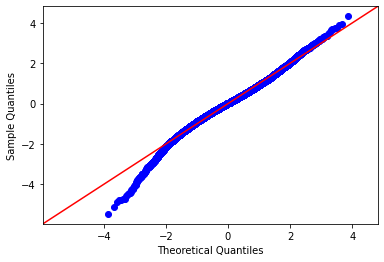

In [118]:
fig = sm.graphics.qqplot(model_6.resid, dist=stats.norm, line='45', fit=True)

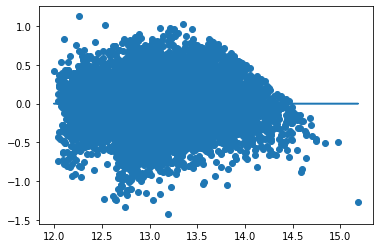

In [119]:
plt.scatter(model_6.predict(X_int), model_6.resid)
plt.plot(model_6.predict(X_int), [0 for i in range(len(X_int))])

Normality and homoscedasticity have improved enough that we are going to accept this model as final.

# Final Model Interpretation

print coefficients and put into a data table - talk about the main drivers of price and what home renovators can do to increase price.

In [120]:
model_6b.coef_

array([ 4.77024193e-07,  2.78812902e-04,  2.15174110e-04,  6.35925079e-05,
        1.57769186e-04, -9.48689466e-02,  3.99925546e-02,  5.38711038e-02,
       -2.42461575e-01, -4.01385095e-01,  1.01104191e-01,  4.97371036e-02,
        4.61900049e-01,  1.59017363e-01,  1.19403725e-01,  1.76069241e-01,
        2.67655313e-01,  1.30111410e-01, -4.53810885e-02, -8.58165392e-02,
       -3.72757172e-02,  7.21954429e-02, -2.65070283e-02, -5.51710955e-02,
       -5.41706225e-01, -4.67944932e-01])

In [136]:
(np.exp(model_6b.coef_)-1)*100

array([ 4.77024307e-05,  2.78851774e-02,  2.15197262e-02,  6.35945299e-03,
        1.57781632e-02, -9.05078813e+00,  4.08030249e+00,  5.53485630e+00,
       -2.15306101e+01, -3.30607768e+01,  1.06391912e+01,  5.09947573e+00,
        5.87086664e+01,  1.72358302e+01,  1.26824754e+01,  1.92520628e+01,
        3.06896592e+01,  1.38955267e+01, -4.43667684e+00, -8.22374107e+00,
       -3.65895301e+00,  7.48653983e+00, -2.61588006e+00, -5.36767775e+00,
       -4.18245199e+01, -3.73711989e+01])

In [137]:
model_6b.transformed_coef = (np.exp(model_6b.coef_)-1)*100

In [138]:
pd.DataFrame(model_6b.coef_, X.columns, columns = ['Coeff'])

,Coeff
sqft_lot,4.770242e-07
sqft_above,2.788129e-04
sqft_basement,2.151741e-04
yr_renovated,6.359251e-05
sqft_living15,1.577692e-04
bedro_6_plus,-9.486895e-02
bathr_2_to_3,3.999255e-02
bathr_3_to_4,5.387110e-02
bathr_5_to_6,-2.424616e-01
bathr_6_plus,-4.013851e-01


In [139]:
pd.DataFrame(model_6b.transformed_coef, X.columns, columns = ['Coeff'])

,Coeff
sqft_lot,0.000048
sqft_above,0.027885
sqft_basement,0.021520
yr_renovated,0.006359
sqft_living15,0.015778
bedro_6_plus,-9.050788
bathr_2_to_3,4.080302
bathr_3_to_4,5.534856
bathr_5_to_6,-21.530610
bathr_6_plus,-33.060777


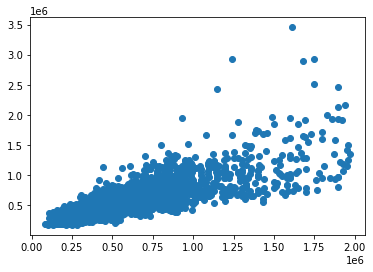

In [140]:
plt.scatter(y_test, y_hat_test)

(array([2.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 2.800e+01, 8.240e+02,
        3.077e+03, 2.660e+02, 5.500e+01, 1.900e+01]),
 array([-1845105.73267466, -1550557.88704657, -1256010.04141849,
         -961462.19579041,  -666914.35016233,  -372366.50453424,
          -77818.65890616,   216729.18672192,   511277.03235001,
          805824.87797809,  1100372.72360617]),
 <BarContainer object of 10 artists>)

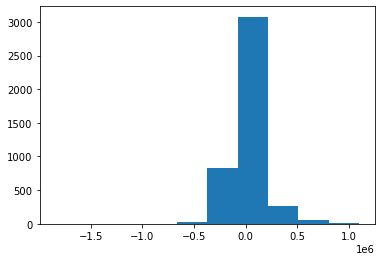

In [141]:
plt.hist(y_test - y_hat_test)

Not exactly normal--maybe need to take care of lower end outliers

In [143]:
data_model_6c.price.describe()

count    2.138900e+04
mean     5.189146e+05
std      2.862905e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.350000e+05
max      1.990000e+06
Name: price, dtype: float64

<AxesSubplot:>

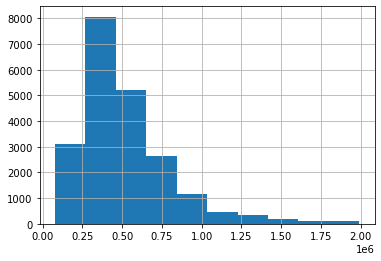

In [144]:
data_model_6c.price.hist()

C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

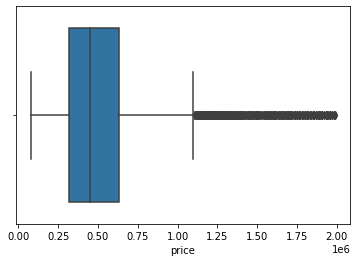

In [145]:
sns.boxplot(data_model_6c.price)